In [119]:
import pandas as pd
import matplotlib.pyplot as plt


In [120]:
df=pd.read_csv("iris.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [121]:
df.drop(["petal_length","petal_width"],axis=1)

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


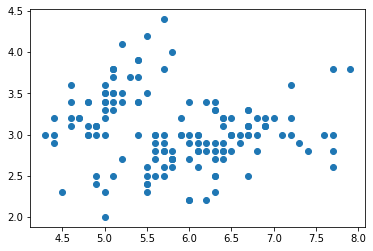

In [122]:
plt.scatter(df["sepal_length"],df["sepal_width"])


In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(df[["sepal_length","sepal_width"]])


array([[0.22222222, 0.625     ],
       [0.16666667, 0.41666667],
       [0.11111111, 0.5       ],
       [0.08333333, 0.45833333],
       [0.19444444, 0.66666667],
       [0.30555556, 0.79166667],
       [0.08333333, 0.58333333],
       [0.19444444, 0.58333333],
       [0.02777778, 0.375     ],
       [0.16666667, 0.45833333],
       [0.30555556, 0.70833333],
       [0.13888889, 0.58333333],
       [0.13888889, 0.41666667],
       [0.        , 0.41666667],
       [0.41666667, 0.83333333],
       [0.38888889, 1.        ],
       [0.30555556, 0.79166667],
       [0.22222222, 0.625     ],
       [0.38888889, 0.75      ],
       [0.22222222, 0.75      ],
       [0.30555556, 0.58333333],
       [0.22222222, 0.70833333],
       [0.08333333, 0.66666667],
       [0.22222222, 0.54166667],
       [0.13888889, 0.58333333],
       [0.19444444, 0.41666667],
       [0.19444444, 0.58333333],
       [0.25      , 0.625     ],
       [0.25      , 0.58333333],
       [0.11111111, 0.5       ],
       [0.

In [124]:
from sklearn.cluster import KMeans
means=KMeans(n_clusters=3)


In [125]:
means.fit(df[["sepal_length","sepal_width"]])

KMeans(n_clusters=3)

In [126]:
pred=means.predict(df[["sepal_length","sepal_width"]])

In [127]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [128]:
df["cluster"]=pred
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [129]:
means.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.006     , 3.418     ],
       [5.77358491, 2.69245283]])

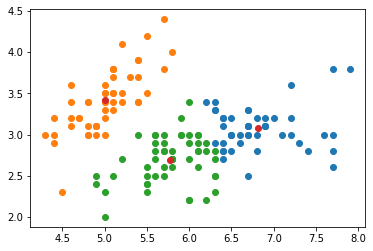

In [134]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1["sepal_length"],df1["sepal_width"])
plt.scatter(df2["sepal_length"],df2["sepal_width"])
plt.scatter(df3["sepal_length"],df3["sepal_width"])
plt.scatter(means.cluster_centers_[:,0],means.cluster_centers_[:,1])

In [103]:
ran=range(1,10)
sse=[]
for k in ran:
    means=KMeans(n_clusters=k)
    means.fit(df[["sepal_length","sepal_width"]])
    sse.append(means.inertia_)
sse

[130.18093333333334,
 57.98240604207882,
 37.1237021276596,
 27.962171178088646,
 20.971913367009606,
 17.314828843591844,
 14.628929179122284,
 12.742245642288745,
 11.292185561789006]

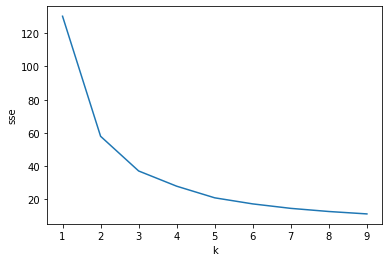

In [104]:
plt.xlabel("k")
plt.ylabel("sse")
plt.plot(ran,sse)
